In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a DataFrame
df = pd.read_csv('BostonHousing.csv')

# Display the first few rows of the dataset
print(df.head())


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


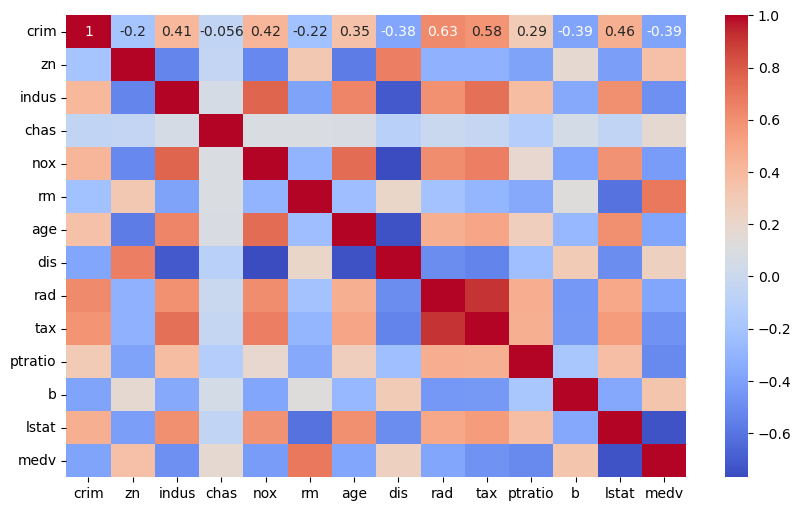

In [9]:
df.isnull().sum()   # Check for missing values
df.describe()       # Summary statistics

plt.figure(figsize=(10, 6)) # Set the size of the plot
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')     # Create a heatmap
plt.show()      # Display the plot

In [13]:
# Separate the features and the target variable
x = df.drop('medv', axis=1)     # Features
y = df['medv']            # Target variable



In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)   # Split the data into training and test sets
print('The size of the training set is: ', x_train.shape)   # Display the size of the training set
print('The size of the test set is: ', x_test.shape)    # Display the size of the test set

The size of the training set is:  (404, 13)
The size of the test set is:  (102, 13)


In [18]:
model = LinearRegression()  # Create a linear regression model
model.fit(x_train, y_train)  # Fit the model to the training data   

print('Intercept: ', model.intercept_)  # Print the intercept
print('Coefficients: ', model.coef_)    # Print the coefficients    
print('Model score: ', model.score(x_test, y_test))  # Print the model score

Intercept:  30.246750993923754
Coefficients:  [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]
Model score:  0.6687594935356314


Mean Squared Error: 24.29111947497357
R-squared: 0.6687594935356314


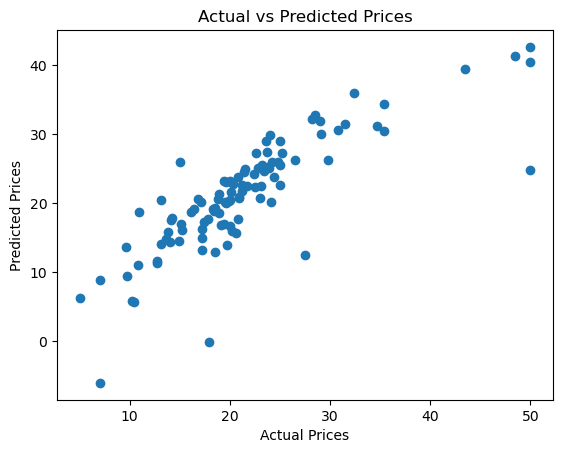

In [20]:
# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)    
r2 = r2_score(y_test, y_pred)   

print(f'Mean Squared Error: {mse}') 
print(f'R-squared: {r2}')   

# Plot the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()
